In [157]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy

dataset = pd.read_csv('data-kmeans.csv')
data = dataset.values

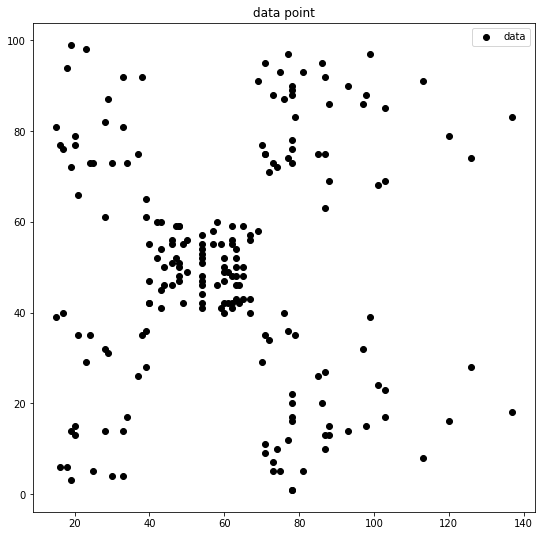

In [3]:
n = data.shape[0]

x1 = data[:,0]
x2 = data[:,1]

plt.figure(1,figsize=(9,9))
plt.scatter(x1, x2, c='k', label='data')
plt.title('data point')
plt.legend()
plt.show()

[[68.         45.62162162]
 [60.36842105 53.15789474]
 [59.6122449  47.        ]
 [58.6        49.94285714]
 [56.82926829 55.63414634]]
[68.         60.36842105 59.6122449  58.6        56.82926829]


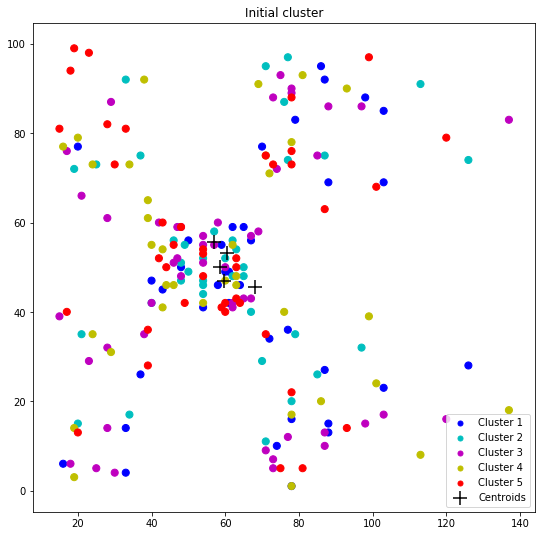

In [227]:
k = 5 # number of cluster

init_labels = np.zeros(n) # initial cluster

for i in range(n):
    init_labels[i] = np.random.randint(k)
    
label_1 = (init_labels==0)
label_2 = (init_labels==1)
label_3 = (init_labels==2)
label_4 = (init_labels==3)
label_5 = (init_labels==4)

centroids = np.zeros((k, 2))

for i in range(k):
    points = [data[j] for j in range(n) if init_labels[j] == i]
    centroids[i] = compute_centroid(points)

print(centroids)
print(centroids[:,0])
    
plt.figure(2,figsize=(9,9))
plt.scatter(x1, x2, s=label_1*50, c='b', label='Cluster 1')
plt.scatter(x1, x2, s=label_2*50, c='c', label='Cluster 2')
plt.scatter(x1, x2, s=label_3*50, c='m', label='Cluster 3')
plt.scatter(x1, x2, s=label_4*50, c='y', label='Cluster 4')
plt.scatter(x1, x2, s=label_5*50, c='r', label='Cluster 5')
plt.scatter(centroids[:,0], centroids[:,1], s=200, c='k', marker='+', label='Centroids')
plt.title('Initial cluster')
plt.legend()
plt.show()

In [155]:
print(init_labels)

[1. 2. 1. 0. 3. 2. 3. 1. 1. 1. 1. 2. 3. 2. 0. 0. 0. 2. 3. 4. 4. 2. 0. 3.
 2. 4. 0. 0. 2. 3. 3. 0. 1. 2. 1. 2. 2. 2. 1. 2. 1. 3. 0. 0. 0. 3. 3. 2.
 1. 1. 4. 0. 4. 4. 2. 4. 1. 2. 2. 1. 3. 3. 1. 0. 2. 4. 0. 2. 3. 1. 4. 1.
 2. 1. 0. 0. 2. 3. 1. 4. 1. 0. 1. 3. 4. 1. 2. 0. 4. 3. 1. 3. 1. 4. 2. 4.
 1. 2. 3. 4. 0. 1. 1. 2. 3. 4. 2. 2. 3. 2. 1. 1. 4. 0. 3. 4. 4. 4. 1. 2.
 4. 1. 1. 3. 4. 4. 0. 0. 4. 3. 2. 3. 1. 3. 3. 4. 0. 1. 3. 2. 4. 0. 0. 3.
 2. 3. 4. 1. 4. 0. 2. 3. 2. 0. 2. 1. 4. 4. 1. 3. 0. 2. 4. 2. 1. 4. 1. 4.
 1. 1. 1. 1. 3. 1. 1. 1. 2. 3. 2. 2. 0. 3. 1. 4. 4. 4. 4. 3. 0. 3. 0. 3.
 2. 1. 1. 2. 4. 2. 2. 4.]


In [77]:
# for i in range(n):
#     labels[i] = compute_label(data[i], centroids)
# print(labels)

# clusters = []
# for i in range(k):
#     cluster = [data[j] for j in range(n) if labels[j] == 0]
#     clusters.append(cluster)

# print(len(clusters[0]))
# print(clusters[0][0])

# loss = compute_loss(clusters, centroids)
# print(loss)
    

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 4. 3. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 4. 1. 3. 4. 4. 3. 1. 3. 3. 3. 4. 3. 4. 0. 4. 4. 0.
 4. 0. 4. 0. 4. 0. 3. 3. 3. 4. 0. 4. 4. 0. 0. 0. 4. 4. 2. 0. 4. 3. 2. 3.
 3. 4. 2. 3. 4. 3. 2. 3. 4. 3. 4. 3. 2. 3. 4. 3. 4. 3. 4. 3. 4. 3. 2. 3.
 4. 3. 2. 3. 2. 3. 4. 3. 2. 3. 4. 3. 4. 3. 4. 3. 2. 3. 4. 3. 2. 2. 2. 3.
 2. 2. 2. 2. 2. 3. 2. 3. 2. 2. 2. 3. 2. 2. 2. 2. 2. 3. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2.]
10
[60 49]
1.7424153937130324


## Define functions

In [195]:
def compute_distance(a, b):

    dist = sum([(el_a - el_b)**2 for el_a, el_b in list(zip(a, b))]) ** 0.5 #distance between a and b#

    return dist


def compute_centroid(Z):

    center = np.mean(Z, axis=0)
    
    return center


def compute_label(z, M):

    distances = np.zeros(k)
    for i in range(k):
        distances[i] = compute_distance(z, M[i])
    label = np.argmin(distances) #label of point z with a set of centroids M#
    
    return label


def compute_loss(C, M):
    
    global n, k
    loss = 0
    for i in range(k):
        n_c = len(C[i])
        for j in range(n_c): 
            loss = loss + compute_distance(C[i][j], centroids[i]) #compute loss#
    
    loss = loss / n
    
    return loss

def grad_desc(labels_init, max_iter):
    
    global n, k
    
    L_iters = np.zeros([max_iter])
#     M_dist_1 = np.zeros([max_iter])
#     M_dist_2 = np.zeros([max_iter])
#     M_dist_3 = np.zeros([max_iter])
#     M_dist_4 = np.zeros([max_iter])
#     M_dist_5 = np.zeros([max_iter])
    M_dists = np.zeros((k,max_iter))
    zeros = np.zeros((2,))
    labels = labels_init
    M = np.zeros((k, 2))
    
    for a in range(max_iter):
        # centroid 계산
        for i in range(k):
            points = [data[j] for j in range(n) if labels[j] == i]
            M[i] = compute_centroid(points)
        #print(M)
            
        # label 계산
        for i in range(n):
            labels[i] = compute_label(data[i], M)
        #print(labels)
            
        # clustering
        clusters = []
        for i in range(k):
            cluster = [data[j] for j in range(n) if labels[j] == 0]
            clusters.append(cluster)
            
        for i in range(k):
            M_dists[i][a] = compute_distance(zeros, M[i])
            
        L_iters[a] = compute_loss(clusters, M)
    
    return L_iters, labels, M, M_dists
        
        
        

In [196]:
zeros = np.zeros((2,))
#print(zeros)

M_dist = np.zeros((k,max_iter))
print(M_dist[0][9])

0.0


[55.09157548 41.49204458 40.25120244 40.25120244 40.25120244 40.25120244
 40.25120244 40.25120244 40.25120244 40.25120244 40.25120244 40.25120244
 40.25120244 40.25120244 40.25120244 40.25120244 40.25120244 40.25120244
 40.25120244 40.25120244]
[[ 81.88609381  93.27614724  88.58828898  89.49433564  89.49433564
   89.49433564  89.49433564  89.49433564  89.49433564  89.49433564
   89.49433564  89.49433564  89.49433564  89.49433564  89.49433564
   89.49433564  89.49433564  89.49433564  89.49433564  89.49433564]
 [ 80.43698175 103.33748166 114.99563706 119.30610799 119.30610799
  119.30610799 119.30610799 119.30610799 119.30610799 119.30610799
  119.30610799 119.30610799 119.30610799 119.30610799 119.30610799
  119.30610799 119.30610799 119.30610799 119.30610799 119.30610799]
 [ 75.91192095  51.99707924  33.60467381  32.72667297  33.60467381
   33.60467381  33.60467381  33.60467381  33.60467381  33.60467381
   33.60467381  33.60467381  33.60467381  33.60467381  33.60467381
   33.60467381  

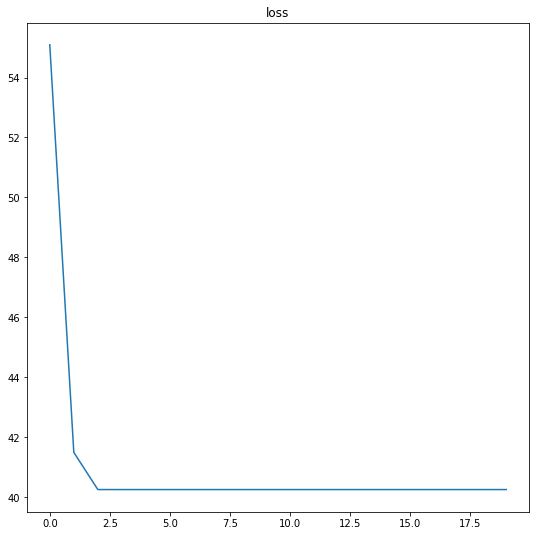

In [228]:
max_iter = 20
i_labels = copy.deepcopy(init_labels)
L_iters, labels, centroids, M_dists = grad_desc(i_labels, max_iter)

label_1 = (labels==0)
label_2 = (labels==1)
label_3 = (labels==2)
label_4 = (labels==3)
label_5 = (labels==4)
    
# plt.figure(2,figsize=(9,9))
# plt.scatter(x1, x2, s=label_1*50, c='b', label='Cluster 1')
# plt.scatter(x1, x2, s=label_2*50, c='c', label='Cluster 2')
# plt.scatter(x1, x2, s=label_3*50, c='m', label='Cluster 3')
# plt.scatter(x1, x2, s=label_4*50, c='y', label='Cluster 4')
# plt.scatter(x1, x2, s=label_5*50, c='r', label='Cluster 5')
# plt.scatter(centroids[:,0], centroids[:,1], s=200, c='k', marker='+', label='Centroids')
# plt.title('Initial cluster')
# plt.legend()
# plt.show()

print(L_iters)
print(M_dists)

plt.figure(3,figsize=(9,9))
plt.plot(np.array(range(max_iter)), L_iters)
plt.title('loss')
plt.show()

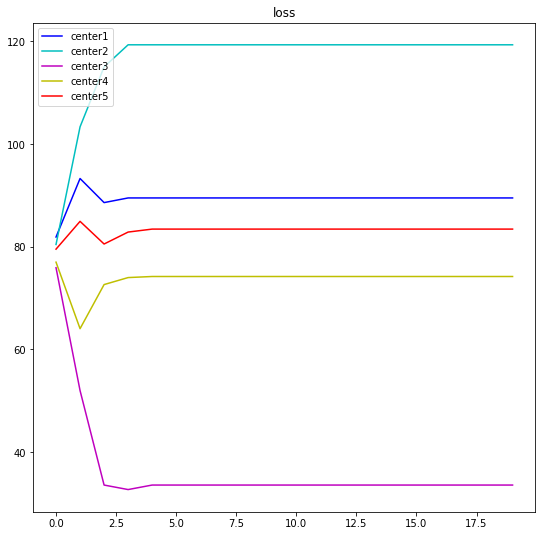

In [229]:
plt.figure(5,figsize=(9,9))
plt.plot(np.array(range(max_iter)), M_dists[0], c='b', label='center1')
plt.plot(np.array(range(max_iter)), M_dists[1], c='c', label='center2')
plt.plot(np.array(range(max_iter)), M_dists[2], c='m', label='center3')
plt.plot(np.array(range(max_iter)), M_dists[3], c='y', label='center4')
plt.plot(np.array(range(max_iter)), M_dists[4], c='r', label='center5')
plt.legend()
plt.title('loss')
plt.show()

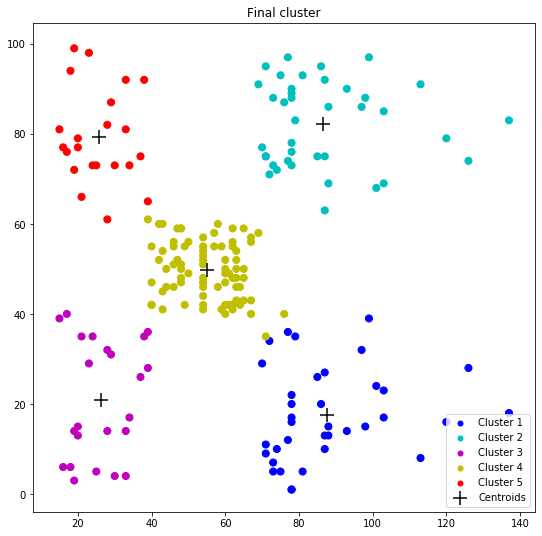

In [231]:
plt.figure(4,figsize=(9,9))
plt.scatter(x1, x2, s=label_1*50, c='b', label='Cluster 1')
plt.scatter(x1, x2, s=label_2*50, c='c', label='Cluster 2')
plt.scatter(x1, x2, s=label_3*50, c='m', label='Cluster 3')
plt.scatter(x1, x2, s=label_4*50, c='y', label='Cluster 4')
plt.scatter(x1, x2, s=label_5*50, c='r', label='Cluster 5')
plt.scatter(centroids[:,0], centroids[:,1], s=200, c='k', marker='+', label='Centroids')
plt.title('Final cluster')
plt.legend()
plt.show()

## 1. Plot the data points [1pt]

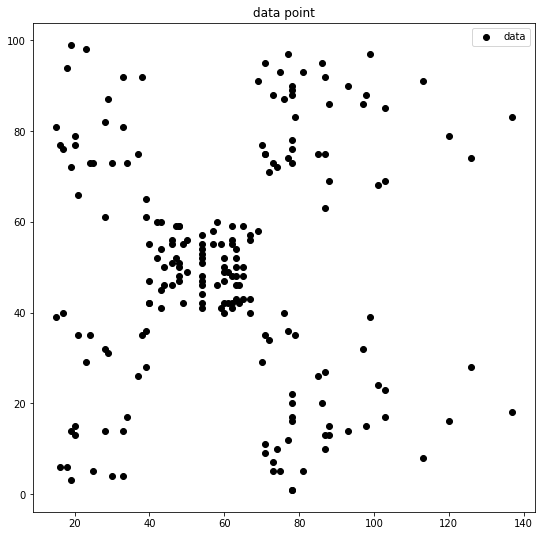

In [19]:
plt.figure(1,figsize=(9,9))
plt.scatter(x1, x2, c='k', label='data')
plt.title('data point')
plt.legend()
plt.show()

## 2. Visualise the initial condition of the point labels [1pt]

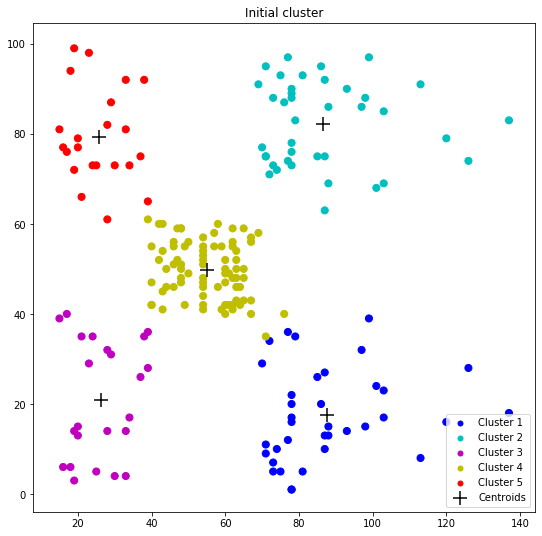

In [232]:
plt.figure(2,figsize=(9,9))
plt.scatter(x1, x2, s=label_1*50, c='b', label='Cluster 1')
plt.scatter(x1, x2, s=label_2*50, c='c', label='Cluster 2')
plt.scatter(x1, x2, s=label_3*50, c='m', label='Cluster 3')
plt.scatter(x1, x2, s=label_4*50, c='y', label='Cluster 4')
plt.scatter(x1, x2, s=label_5*50, c='r', label='Cluster 5')
plt.scatter(centroids[:,0], centroids[:,1], s=200, c='k', marker='+', label='Centroids')
plt.title('Initial cluster')
plt.legend()
plt.show()

## 3. Plot the loss curve [5pt]

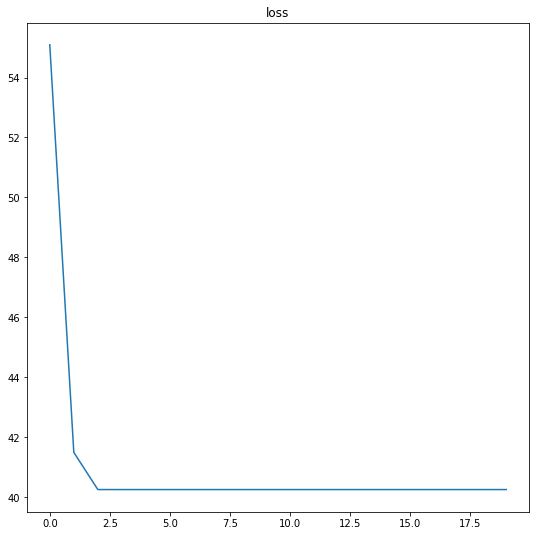

In [233]:
plt.figure(3,figsize=(9,9))
plt.plot(np.array(range(max_iter)), L_iters)
plt.title('loss')
plt.show()

## 4. Plot the centroid of each cluster [5pt]

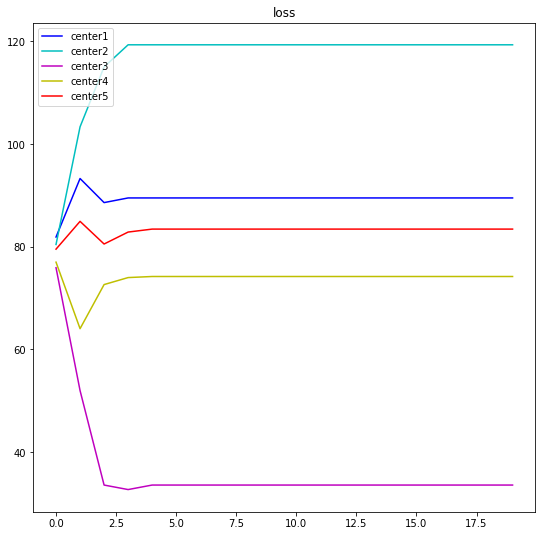

In [234]:
plt.figure(5,figsize=(9,9))
plt.plot(np.array(range(max_iter)), M_dists[0], c='b', label='center1')
plt.plot(np.array(range(max_iter)), M_dists[1], c='c', label='center2')
plt.plot(np.array(range(max_iter)), M_dists[2], c='m', label='center3')
plt.plot(np.array(range(max_iter)), M_dists[3], c='y', label='center4')
plt.plot(np.array(range(max_iter)), M_dists[4], c='r', label='center5')
plt.legend()
plt.title('loss')
plt.show()

## 5. Plot the final clustering result [5pt]

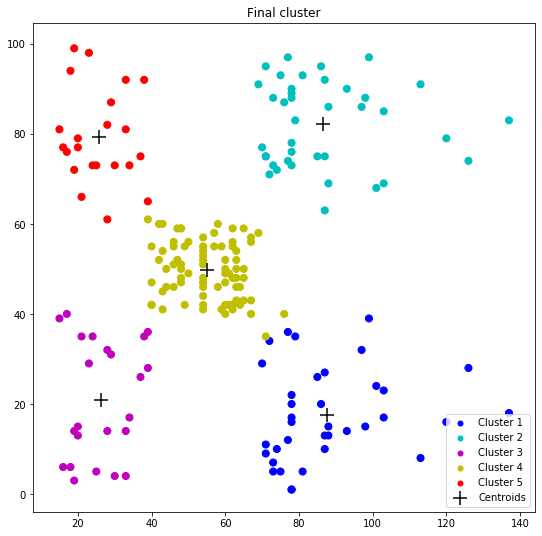

In [235]:
plt.figure(4,figsize=(9,9))
plt.scatter(x1, x2, s=label_1*50, c='b', label='Cluster 1')
plt.scatter(x1, x2, s=label_2*50, c='c', label='Cluster 2')
plt.scatter(x1, x2, s=label_3*50, c='m', label='Cluster 3')
plt.scatter(x1, x2, s=label_4*50, c='y', label='Cluster 4')
plt.scatter(x1, x2, s=label_5*50, c='r', label='Cluster 5')
plt.scatter(centroids[:,0], centroids[:,1], s=200, c='k', marker='+', label='Centroids')
plt.title('Final cluster')
plt.legend()
plt.show()